# Catch Them All

## Abstract:

The following project is an analysis of the Pokemon dataset taken from https://www.kaggle.com/alopez247/pokemon. The primary focus of the project is to determine which types of pokemon are the easiest to catch. The project will use features such as Pokemon Type, egg Type, color, and Pokemon stat features as predictors for catch rate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv('C:\\Users\\cocob\\Downloads\\pokemon_alopez247.csv')

In [3]:
df.columns.values

array(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1',
       'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg',
       'Catch_Rate', 'Body_Style'], dtype=object)

## Data Manipulation

Below is a small amount of data cleaning by eliminating missing values.

In [4]:
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [5]:
df2 = df.dropna()

In [6]:
df2.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000
mean,361.333,422.039,70.059,76.431,75.431,69.284,70.304,60.529,3.353,0.586,1.135,53.834,94.529
std,203.661,93.099,20.885,27.982,24.521,24.211,21.502,24.781,1.645,0.178,0.772,65.490,66.041
min,1.000,210.000,30.000,20.000,30.000,20.000,25.000,10.000,1.000,0.000,0.200,0.500,25.000
25%,190.250,340.000,55.000,55.000,55.500,54.250,55.000,42.500,2.000,0.500,0.610,9.750,45.000
50%,360.000,430.500,70.000,75.000,76.500,65.000,70.000,59.000,3.000,0.500,0.990,29.000,67.500
75%,546.750,493.000,84.750,92.000,90.000,85.000,85.000,80.000,5.000,0.500,1.400,78.225,120.000
max,709.000,600.000,130.000,140.000,133.000,125.000,123.000,116.000,6.000,1.000,6.500,310.000,255.000


In [7]:
df2.head(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.710,6.900,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.990,13.000,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.010,100.000,45,quadruped
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Red,True,0.875,Monster,Dragon,True,1.700,90.500,45,bipedal_tailed
33,34,Nidoking,Poison,Ground,505,81,102,77,85,75,...,Purple,True,1.000,Monster,Field,False,1.400,62.000,45,bipedal_tailed
45,46,Paras,Bug,Grass,285,35,70,55,45,55,...,Red,True,0.500,Bug,Grass,False,0.300,5.400,190,insectoid
46,47,Parasect,Bug,Grass,405,60,95,80,60,80,...,Red,True,0.500,Bug,Grass,False,0.990,29.500,75,insectoid
78,79,Slowpoke,Water,Psychic,315,90,65,65,40,40,...,Pink,True,0.500,Monster,Water_1,False,1.190,36.000,190,quadruped
79,80,Slowbro,Water,Psychic,490,95,75,110,100,80,...,Pink,True,0.500,Monster,Water_1,True,1.600,78.500,75,bipedal_tailed
82,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,...,Brown,True,0.500,Flying,Field,False,0.790,15.000,45,two_wings


In [8]:
df4 = pd.get_dummies(df2, columns=['Type_1', 'Type_2', 'Color', 'Egg_Group_1', 'Egg_Group_2']).head()

## Feature Correlation

The point of the correlation is to determine if any features are dependent on one another.

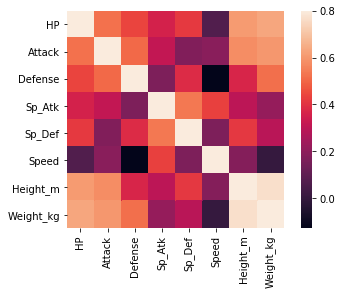

In [9]:
df3 = df2.drop(['isLegendary', 'Pr_Male', 'hasGender', 'Generation', 'Number', 'Total', 'Catch_Rate', 'hasMegaEvolution'], axis= 1)
corrmat = df3.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Linear Regression

Linear Regression is used to combine stat features to predict catch rate.

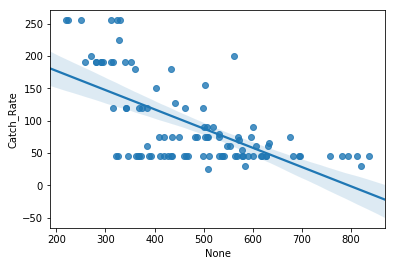

In [10]:
sns.regplot(x= df2['HP'] + df2['Attack'] + df2['Defense'] + df2['Sp_Atk'] + df2['Sp_Def'] + df2['Speed'] + df2['Height_m'] + df2['Weight_kg'], y=df2['Catch_Rate'])

In [11]:
regr = linear_model.LinearRegression()
Y = df2['Catch_Rate']
X = df2[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-0.19094606 -0.60623326 -0.94503195 -0.82944293  0.02134523 -0.54973142
 -9.71966771  0.1704577 ]

Intercept: 
 316.6279757895403

R-squared:
0.5693297923783909


## Random Forest

The information below was not included in the final report. The point was to work with the features in order to determine which feature might be the best predictors for catch rate.

In [13]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [14]:
rfc = ensemble.RandomForestClassifier()
X = df2['Type_1'] + df2['Type_2'] + df2['Color'] + df2['Egg_Group_1'] + df2['Egg_Group_2']
#X = df4.drop(['Catch_Rate', 'Number', 'MegaEvolution', 'Catchrate2', 'Name', 'Body_Style', 'Pr_Male', 'isLegendary', 'Generation', 'hasGender', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'hasMegaEvolution'], 1)
Y = df2['Catch_Rate']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X = np.array(X.dropna(axis=1))
Y = pd.get_dummies(Y)

cross_val_score(rfc, X, Y, cv=10)

array([0.54545455, 0.63636364, 0.3       , 0.5       , 0.2       ,
       0.4       , 0.5       , 0.2       , 0.3       , 0.2       ])

In [15]:
rfc.fit(X, Y)
rfc.score(X, Y)

0.6470588235294118

## Graphs

Below are the visuals that were used in the final report. The first three were not included in the final report since those features were not used for predicting catch rate.

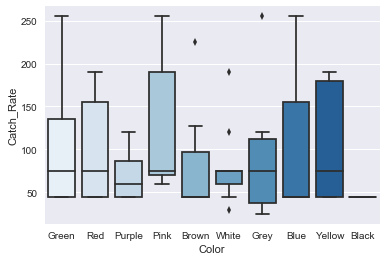

In [16]:
sns.set(style='darkgrid')
df6= sns.boxplot(x='Color', y='Catch_Rate', data=df2, palette='Blues') 
#plt.title('')
plt.show()

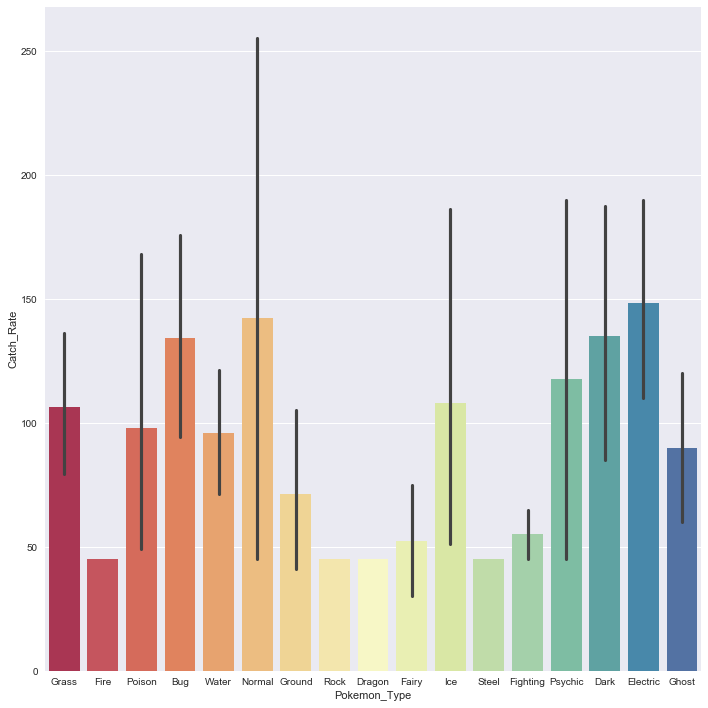

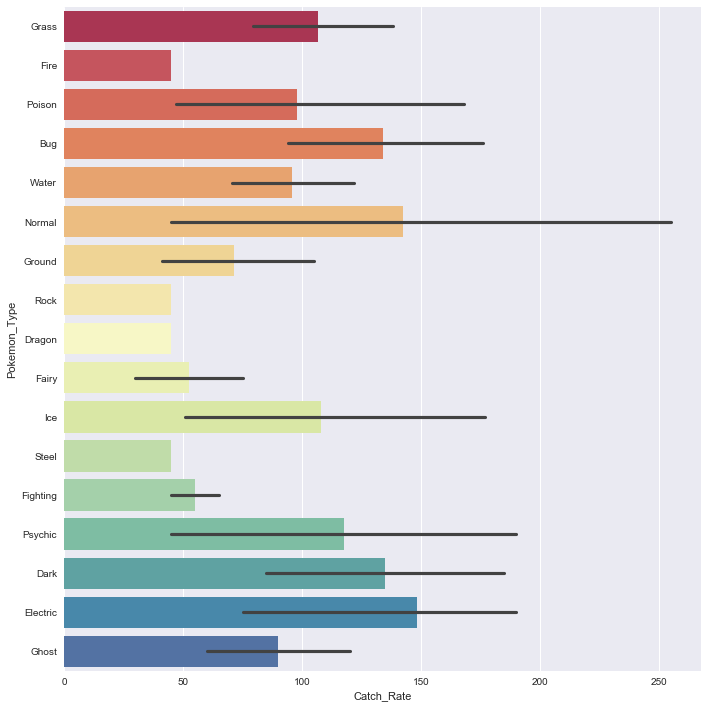

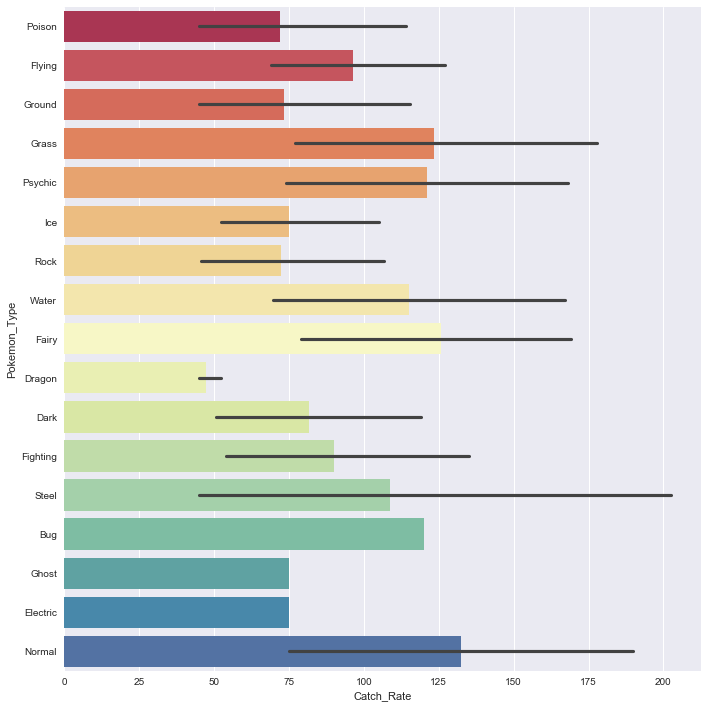

In [17]:
sns.set(style='darkgrid')
df4 = sns.factorplot(y='Catch_Rate', x='Type_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_xlabels('Pokemon_Type')
df4.set_ylabels('Catch_Rate')
#plt.title('Catch Rate Based on Pokemon Type')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Type_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Pokemon_Type')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Pokemon Type')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Type_2', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Pokemon_Type')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Pokemon Type')
plt.show()

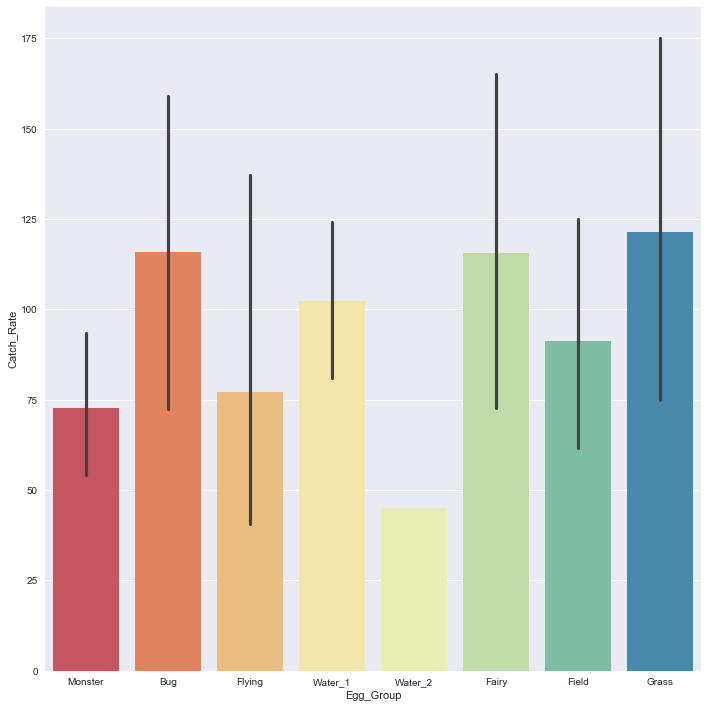

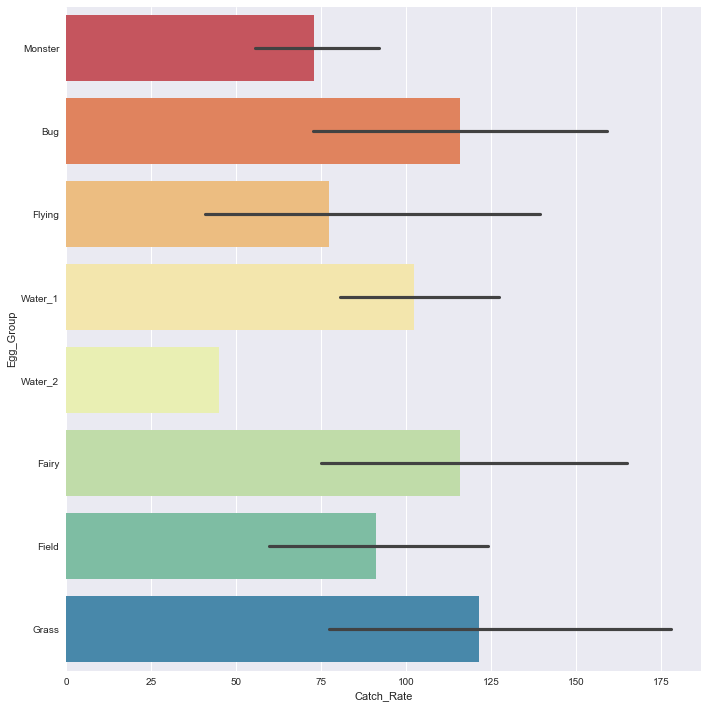

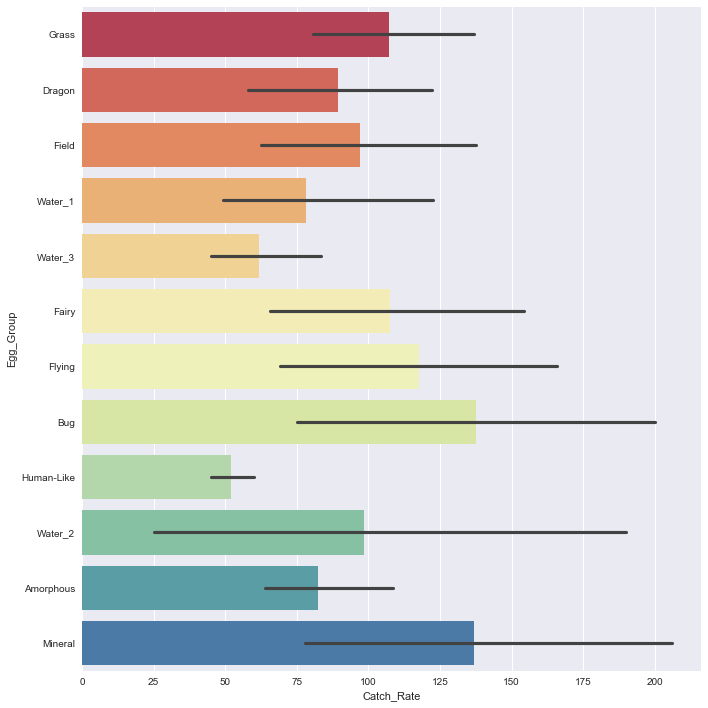

In [18]:
sns.set(style='darkgrid')
df4 = sns.factorplot(y='Catch_Rate', x='Egg_Group_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_xlabels('Egg_Group')
df4.set_ylabels('Catch_Rate')
#plt.title('Catch Rate Based on Egg Group')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Egg_Group_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Egg_Group')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Egg Group')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Egg_Group_2', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Egg_Group')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Egg Group')
plt.show()

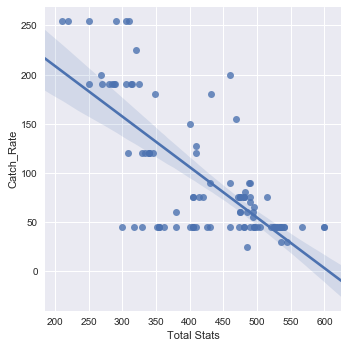

In [19]:
df5 = sns.lmplot(y='Catch_Rate', x='Total', data=df2, fit_reg=True)
df5.set_ylabels('Catch_Rate')
df5.set_xlabels('Total Stats')
#plt.title('Catch Rate based on Total Stats')
plt.show()

## Catch Rate Count

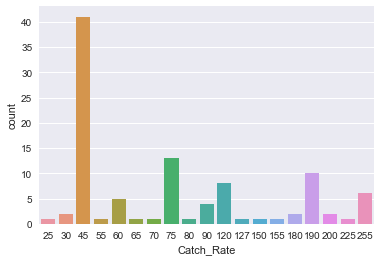

In [20]:
sns.countplot(x='Catch_Rate', data=df2)

## Conclusion

Based on the features used in the final report, normal Pokemon types are the most likely to be captured. In contrast, dragon pokemon types are least likely to be captured. When looking at the egg type, water eggs are least likley to be captured. Yellow and Pink Pokemon are most likely to be capture and are commonly occuring, while white and black Pokemon are least likley to be captured and are rare to come by. Finally, Pokemon stats are moderately fair predictors for catch rate. As stats increase, the catch rate decreases. Stronger Pokemon are harder to capture.